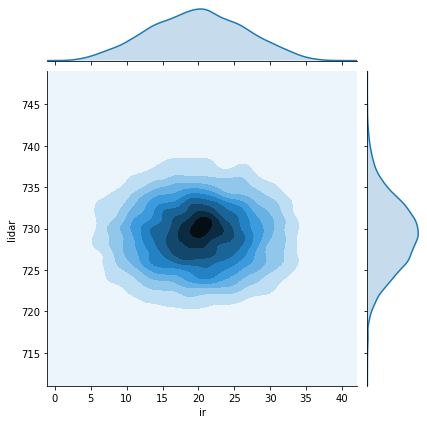

In [1]:
#2次元ガウス分布
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./sensor_data_700.txt",delimiter=" ", header=None, names = ["date","time","ir","lidar"])

d = data[ (data["time"]<160000) & (data["time"]>=120000) ]
d = d.loc[:, ["ir","lidar"]]

sns.jointplot(x=d["ir"],y=d["lidar"],data=d,kind="kde")

In [3]:
#光センサとlidarの測定値の共分散の計算_1
print("光センサの計測値の分散:", d.ir.var())
print("LIDARの計測値の分散:", d.lidar.var())

diff_ir = d.ir - d.ir.mean()
diff_lidar = d.lidar - d.lidar.mean()
a = diff_ir*diff_lidar
print("共分散:", sum(a)/len(d))

d.mean()

光センサの計測値の分散: 42.117126367701594
LIDARの計測値の分散: 17.702026469211457
共分散: -0.31675568619766026


ir        19.860247
lidar    729.311958
dtype: float64

In [4]:
#光センサとlidarの測定値の共分散の計算_2
d.cov()

,ir,lidar
ir,42.117126,-0.316778
lidar,-0.316778,17.702026


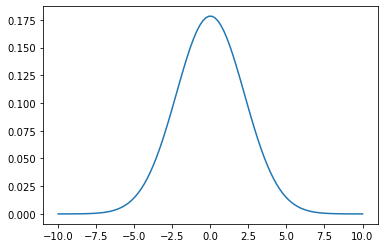

In [31]:
from scipy.stats import multivariate_normal
irlidar = multivariate_normal(mean=d.mean().values.T, cov=d.cov().values) #平均値と共分散が既知の、多次元の正規分布に従う、乱数を生成し、irlidarに代入している。

x = np.linspace(-10,10,100)
y = multivariate_normal.pdf(x, mean=0, cov=5)
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y)

#x,y = np.mgrid[0:40,710:750]
#pos = np.zeros(x.shape + (2,))
#pos[:,:,0] = x
#pos[:,:,1] = y
#cont = plt.contour(x,y,irlidar.pdf(pos))
#cont.clabel(fmt='%1.1e')
#plt.show()